<a href="https://colab.research.google.com/github/GyanendraChaubey/Intrusion-Detection/blob/main/DoS_NB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
import pandas.util.testing as tm

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Read the data
data=pd.read_csv("/content/drive/My Drive/DOS.csv")

In [5]:
#Making a copy of data
data=data.copy()

#Feature Engineering

1. Understanding Data

In [6]:
#checking the missing values
data.isnull().sum()

pkSeqID              0
proto                0
saddr                0
sport                0
daddr                0
dport                0
seq                  0
stddev               0
N_IN_Conn_P_SrcIP    0
min                  0
state_number         0
mean                 0
N_IN_Conn_P_DstIP    0
drate                0
srate                0
max                  0
attack               0
category             0
subcategory          0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471752 entries, 0 to 471751
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pkSeqID            471752 non-null  int64  
 1   proto              471752 non-null  object 
 2   saddr              471752 non-null  object 
 3   sport              471752 non-null  int64  
 4   daddr              471752 non-null  object 
 5   dport              471752 non-null  int64  
 6   seq                471752 non-null  int64  
 7   stddev             471752 non-null  float64
 8   N_IN_Conn_P_SrcIP  471752 non-null  int64  
 9   min                471752 non-null  float64
 10  state_number       471752 non-null  int64  
 11  mean               471752 non-null  float64
 12  N_IN_Conn_P_DstIP  471752 non-null  int64  
 13  drate              471752 non-null  float64
 14  srate              471752 non-null  float64
 15  max                471752 non-null  float64
 16  at

In [8]:
data.head()

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,1240757,udp,192.168.100.150,48719,192.168.100.3,80,99168,1.823185,63,0.000000,4,3.222832,63,0.000000,0.461435,4.942302,1,DoS,UDP
1,409928,tcp,192.168.100.147,25305,192.168.100.7,80,146299,1.755521,100,0.000000,3,1.013550,100,0.000000,0.178650,4.054201,1,DoS,TCP
2,787741,udp,192.168.100.149,33530,192.168.100.5,80,170464,2.113912,100,0.000000,4,2.112801,100,0.000000,0.209328,4.322539,1,DoS,UDP
3,1429027,udp,192.168.100.148,108,192.168.100.6,80,25284,0.028597,100,4.002665,4,4.046831,100,0.000000,0.247826,4.082324,1,DoS,UDP
4,56836,tcp,192.168.100.148,19521,192.168.100.6,80,55359,0.117809,78,0.000000,1,0.061803,78,0.038164,0.127681,0.297244,1,DoS,TCP


In [9]:
data['proto'].unique()

array(['udp', 'tcp', 'arp', 'ipv6-icmp'], dtype=object)

In [10]:
data['saddr'].unique()

array(['192.168.100.150', '192.168.100.147', '192.168.100.149',
       '192.168.100.148', '192.168.100.5', '192.168.100.3',
       '192.168.100.6', '192.168.100.27', 'fe80::250:56ff:febe:254',
       '192.168.100.7', 'fe80::250:56ff:febe:e9d9', '192.168.100.46',
       'fe80::250:56ff:febe:26db', '192.168.100.1',
       'fe80::250:56ff:febe:89ee', '192.168.100.4'], dtype=object)

In [11]:
data['daddr'].unique()

array(['192.168.100.3', '192.168.100.7', '192.168.100.5', '192.168.100.6',
       '192.168.217.2', '192.168.100.55', '192.168.100.150',
       '192.168.100.149', '255.255.255.255', '192.168.100.148',
       '96.7.49.66', '205.251.197.206', '192.168.100.1',
       '205.251.194.201', '224.0.0.251', '205.251.196.32',
       '52.201.147.106', '192.5.5.241', '192.55.83.30', '192.31.80.30',
       '8.8.8.8', '13.55.154.73', 'ff02::2', '192.168.100.147',
       '192.41.162.30', '129.250.35.250', 'ff02::fb', '27.124.125.250',
       '199.19.56.1', '192.33.14.30', '205.251.199.148', '192.58.128.30',
       '192.12.94.30', '205.251.196.160', '205.251.199.194',
       '192.36.148.17', '184.85.248.65', '192.33.4.12', '52.11.124.117',
       '192.168.100.255', '192.54.112.30', 'ff02::1', '172.217.25.170',
       '205.251.194.102', '192.112.36.4', '205.251.194.86',
       '192.168.100.27', '192.52.178.30', '205.251.195.59', '52.35.35.13'],
      dtype=object)

In [12]:
data.describe()

,pkSeqID,sport,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack
count,4.717520e+05,471752.000000,471752.000000,471752.000000,471752.000000,471752.000000,471752.000000,471752.000000,471752.000000,471752.000000,471752.000000,471752.000000,471752.000000,471752.000000
mean,8.253817e+05,32932.470669,92.306246,124909.947621,0.869242,84.267776,0.738609,3.289317,1.979729,84.278047,0.009780,2.622580,2.802114,0.999750
std,4.782077e+05,19184.837789,709.720345,75741.590833,0.853363,23.311734,1.437318,1.102035,1.537813,23.309707,3.175927,1455.938708,1.965062,0.015814
min,5.000000e+00,-1.000000,-1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4.120795e+05,16141.000000,80.000000,58571.000000,0.016485,72.000000,0.000000,3.000000,0.117820,72.000000,0.000000,0.132332,0.161874,1.000000
50%,8.244905e+05,32948.000000,80.000000,121885.500000,0.531122,100.000000,0.000000,4.000000,2.161920,100.000000,0.000000,0.233901,3.737601,1.000000
75%,1.238013e+06,49891.000000,80.000000,190572.250000,1.779085,100.000000,0.160881,4.000000,3.310120,100.000000,0.000000,0.348328,4.479992,1.000000
max,3.577360e+06,65535.000000,62893.000000,262207.000000,2.444468,100.000000,4.950444,8.000000,4.966808,100.000000,2178.649170,1000000.000000,4.999998,1.000000


In [13]:
#Removing the unwanted coloumns
col=['saddr','daddr','category','attack']
data=data.drop(columns=col,axis=1)

In [14]:
#Removing the dublicate values
data.drop_duplicates(keep='first',inplace=True)

2. Exploratory Data Analysis

In [15]:
data.head()

,pkSeqID,proto,sport,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,subcategory
0,1240757,udp,48719,80,99168,1.823185,63,0.000000,4,3.222832,63,0.000000,0.461435,4.942302,UDP
1,409928,tcp,25305,80,146299,1.755521,100,0.000000,3,1.013550,100,0.000000,0.178650,4.054201,TCP
2,787741,udp,33530,80,170464,2.113912,100,0.000000,4,2.112801,100,0.000000,0.209328,4.322539,UDP
3,1429027,udp,108,80,25284,0.028597,100,4.002665,4,4.046831,100,0.000000,0.247826,4.082324,UDP
4,56836,tcp,19521,80,55359,0.117809,78,0.000000,1,0.061803,78,0.038164,0.127681,0.297244,TCP


In [16]:
data['subcategory']=data['subcategory'].map({'Normal':0,'HTTP':1,'TCP':2,'UDP':3})

In [17]:
#Frequency of each category
data['proto'].value_counts()

udp          295155
tcp          176573
arp              21
ipv6-icmp         3
Name: proto, dtype: int64

In [18]:
#relationship between the independent variables
data.corr()

,pkSeqID,sport,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,subcategory
pkSeqID,1.000000,0.021638,-0.015214,0.156981,0.452292,0.045582,0.369563,0.677015,0.776419,0.043720,0.006821,0.008266,0.746468,0.823537
sport,0.021638,1.000000,-0.029148,0.172116,-0.064927,-0.027468,0.063847,-0.015773,0.004502,-0.026983,0.001893,0.001908,-0.019713,-0.015465
dport,-0.015214,-0.029148,1.000000,-0.028086,-0.016902,-0.024467,-0.008508,-0.014490,-0.021517,-0.024515,0.000176,-0.000082,-0.023488,-0.023525
seq,0.156981,0.172116,-0.028086,1.000000,-0.018135,0.063622,0.139803,-0.034184,0.080041,0.062902,-0.003021,-0.002041,0.070072,0.073943
stddev,0.452292,-0.064927,-0.016902,-0.018135,1.000000,0.008810,-0.397182,0.476280,0.397725,0.008633,-0.002543,-0.001633,0.723486,0.539925
N_IN_Conn_P_SrcIP,0.045582,-0.027468,-0.024467,0.063622,0.008810,1.000000,0.027228,0.041350,0.037602,0.999216,-0.004967,-0.004467,0.029202,0.041322
min,0.369563,0.063847,-0.008508,0.139803,-0.397182,0.027228,1.000000,0.307356,0.607795,0.027020,-0.001351,-0.000641,0.330793,0.377406
state_number,0.677015,-0.015773,-0.014490,-0.034184,0.476280,0.041350,0.307356,1.000000,0.735344,0.040315,-0.004570,-0.002020,0.724103,0.831089
mean,0.776419,0.004502,-0.021517,0.080041,0.397725,0.037602,0.607795,0.735344,1.000000,0.037176,-0.003510,-0.001877,0.886965,0.881040
N_IN_Conn_P_DstIP,0.043720,-0.026983,-0.024515,0.062902,0.008633,0.999216,0.027020,0.040315,0.037176,1.000000,-0.004759,-0.004343,0.028830,0.040200


In [19]:
#Cross tables and data visualization
#Extracting the coloumn names
data.columns

Index(['pkSeqID', 'proto', 'sport', 'dport', 'seq', 'stddev',
       'N_IN_Conn_P_SrcIP', 'min', 'state_number', 'mean', 'N_IN_Conn_P_DstIP',
       'drate', 'srate', 'max', 'subcategory'],
      dtype='object')

In [20]:
#proto proportion table
pd.crosstab(index=data['proto'],columns='count',normalize=True)

col_0,count
proto,
arp,0.000045
ipv6-icmp,0.000006
tcp,0.374292
udp,0.625657


In [21]:
#proto vs attack
pd.crosstab(index=data['proto'],columns=data['subcategory'],normalize=True)

subcategory,0,1,2,3
proto,,,,
arp,0.000021,0.000000,0.000008,0.000015
ipv6-icmp,0.000006,0.000000,0.000000,0.000000
tcp,0.000028,0.000926,0.373338,0.000000
udp,0.000195,0.000000,0.000000,0.625462


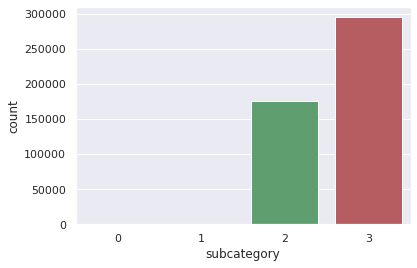

In [22]:
#frequency distribution of attack
sns.countplot(data['subcategory'])

In [23]:

data=data.drop(columns='pkSeqID')

In [24]:
#Categorical Encoding
data=pd.get_dummies(data)

In [28]:
data.head()

,sport,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,subcategory,proto_arp,proto_ipv6-icmp,proto_tcp,proto_udp
0,48719,80,99168,1.823185,63,0.000000,4,3.222832,63,0.000000,0.461435,4.942302,3,0,0,0,1
1,25305,80,146299,1.755521,100,0.000000,3,1.013550,100,0.000000,0.178650,4.054201,2,0,0,1,0
2,33530,80,170464,2.113912,100,0.000000,4,2.112801,100,0.000000,0.209328,4.322539,3,0,0,0,1
3,108,80,25284,0.028597,100,4.002665,4,4.046831,100,0.000000,0.247826,4.082324,3,0,0,0,1
4,19521,80,55359,0.117809,78,0.000000,1,0.061803,78,0.038164,0.127681,0.297244,2,0,0,1,0


In [29]:
#Seperating the features and target variable
y=data['subcategory']
x=data.drop(columns='subcategory')

In [30]:
data.shape

(471752, 17)

In [31]:
x.shape

(471752, 16)

#

In [32]:
#Balancing the target variable
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state = 0)
x, y = smk.fit_sample(x,y)

In [33]:
x.shape

(1180278, 16)

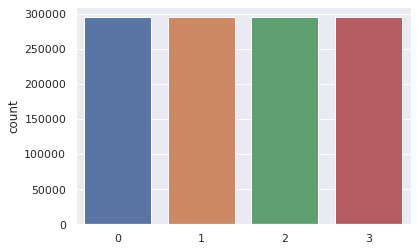

In [34]:
sns.countplot(y)

In [35]:
#Spliting dataset into Train and Test set 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

In [36]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [37]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import cross_val_score
clf=GaussianNB()
clf.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [40]:
#Checking the accuracy of model
from sklearn.metrics import accuracy_score
y_pred=clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(" Testing Accuracy: %.2f%%" % (accuracy * 100.0))
#scores = cross_val_score(clf, x_train, y_train, cv=10)
#print("Cross Validation Accuracy: %.2f%% " % (scores.mean()*100))

 Testing Accuracy: 99.74%


Text(0.5, 1.0, 'Naive Bayes Classifier')

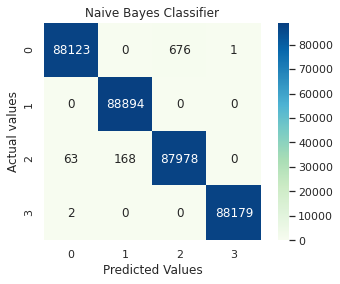

In [41]:
#confusion matrix
from sklearn.metrics import confusion_matrix
con = confusion_matrix(y_test,y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
axes = sns.heatmap(con, square=True,annot=True,fmt='d',cbar = True, cmap = plt.cm.GnBu)
ax = plt.axes()
plt.xlabel('Predicted Values')
plt.ylabel('Actual values')
ax.set_title('Naive Bayes Classifier')

In [42]:
from sklearn.metrics import classification_report
print('Naive Bayes Classifier')
print(classification_report(y_test, y_pred))

Naive Bayes Classifier
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     88800
           1       1.00      1.00      1.00     88894
           2       0.99      1.00      0.99     88209
           3       1.00      1.00      1.00     88181

    accuracy                           1.00    354084
   macro avg       1.00      1.00      1.00    354084
weighted avg       1.00      1.00      1.00    354084



In [43]:
#from sklearn.metrics import roc_auc_score
#roc_auc_score(y_test,y_pred)

KeyboardInterrupt: ignored

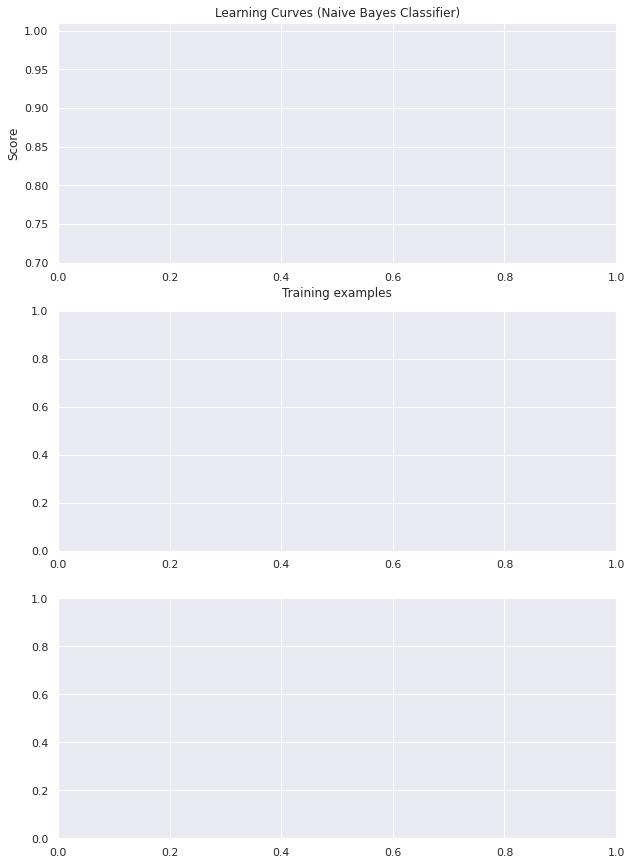

In [44]:
#from sklearn.model_selection import learning_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, x, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
   
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, x, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")


fig, axes = plt.subplots(3, 1, figsize=(10, 15))

title = "Learning Curves (Naive Bayes Classifier)"
# Cross validation with 10 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, x, y,axes=axes[:,], cv=cv, ylim=(0.7, 1.01), n_jobs=4)

plt.show()